In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

c:\Users\aryan.singh\OneDrive - ArcelorMittal\PersonalLearning\MachineLearning\OtherAlgorithm\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 16.0k/16.0k [00:00<00:00, 201kB/s]

Extracting files...
Path to dataset files: C:\Users\aryan.singh\.cache\kagglehub\datasets\mirichoi0218\insurance\versions\1


In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt    
%matplotlib inline   

csv_file_location = "insurance.csv"

In [52]:
df = pd.read_csv(csv_file_location)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.shape

(1338, 7)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [58]:
# convert sex column to numerical columns and make it int 
df['sex'] = np.where(df['sex'].str.lower().str.startswith("male"),1,0)

In [59]:
df['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [60]:
df['sex'] = df['sex'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [61]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [21]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [62]:
df['smoker'] = np.where(df['smoker'].str.lower().str.startswith("yes"),1,0)

In [63]:
df['smoker'].unique()

array([1, 0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [64]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [65]:
#since region have nmore then 2 category so we will use data encoding for one hot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
encoded_array  = one_hot_encoder.fit_transform(df[['region']]).toarray()


In [66]:
#after using one hot encoder we need to create column and then define column name since we will have 4 column name based on category
encoded_df = pd.DataFrame(encoded_array,columns=one_hot_encoder.get_feature_names_out(['region']))

In [67]:
encoded_df.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [68]:
# need to drop region column since we dont need it then merge df and encoded df 
df = df.drop(columns=['region'],axis=1)
df.shape

(1338, 6)

In [69]:
df = pd.concat([df,encoded_df],axis=1)

In [70]:
df.shape

(1338, 10)

In [71]:
# now deine the independent and dependent features
X = df.iloc[:,:-1] #INDEPENDENT features
y = df.iloc[:,1] # dependent features

In [43]:
X

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0


In [72]:
#apply train test model 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
X_train 

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
693,24,1,23.655,0,0,2352.96845,0.0,1.0,0.0
1297,28,0,26.510,2,0,4340.44090,0.0,0.0,1.0
634,51,1,39.700,1,0,9391.34600,0.0,0.0,0.0
1022,47,1,36.080,1,1,42211.13820,0.0,0.0,1.0
178,46,0,28.900,2,0,8823.27900,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4561.18850,1.0,0.0,0.0
1130,39,0,23.870,5,0,8582.30230,0.0,0.0,1.0
1294,58,1,25.175,0,0,11931.12525,1.0,0.0,0.0
860,37,0,47.600,2,1,46113.51100,0.0,0.0,0.0


In [73]:
X_train.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
age,1.000000,-0.012385,0.111325,0.055070,-0.037916,0.293434,-0.012805,0.016715,-0.023557
sex,-0.012385,1.000000,0.001931,0.016610,0.054671,0.043353,0.010928,0.031963,-0.025798
bmi,0.111325,0.001931,1.000000,-0.003459,-0.001499,0.195828,-0.154166,-0.109244,0.238183
children,0.055070,0.016610,-0.003459,1.000000,0.025488,0.079823,0.009031,0.038969,-0.032380
smoker,-0.037916,0.054671,-0.001499,0.025488,1.000000,0.781981,0.013951,-0.031689,0.044016
charges,0.293434,0.043353,0.195828,0.079823,0.781981,1.000000,0.005468,-0.029970,0.052966
region_northeast,-0.012805,0.010928,-0.154166,0.009031,0.013951,0.005468,1.000000,-0.329342,-0.340872
region_northwest,0.016715,0.031963,-0.109244,0.038969,-0.031689,-0.029970,-0.329342,1.000000,-0.336343
region_southeast,-0.023557,-0.025798,0.238183,-0.032380,0.044016,0.052966,-0.340872,-0.336343,1.000000


<Axes: >

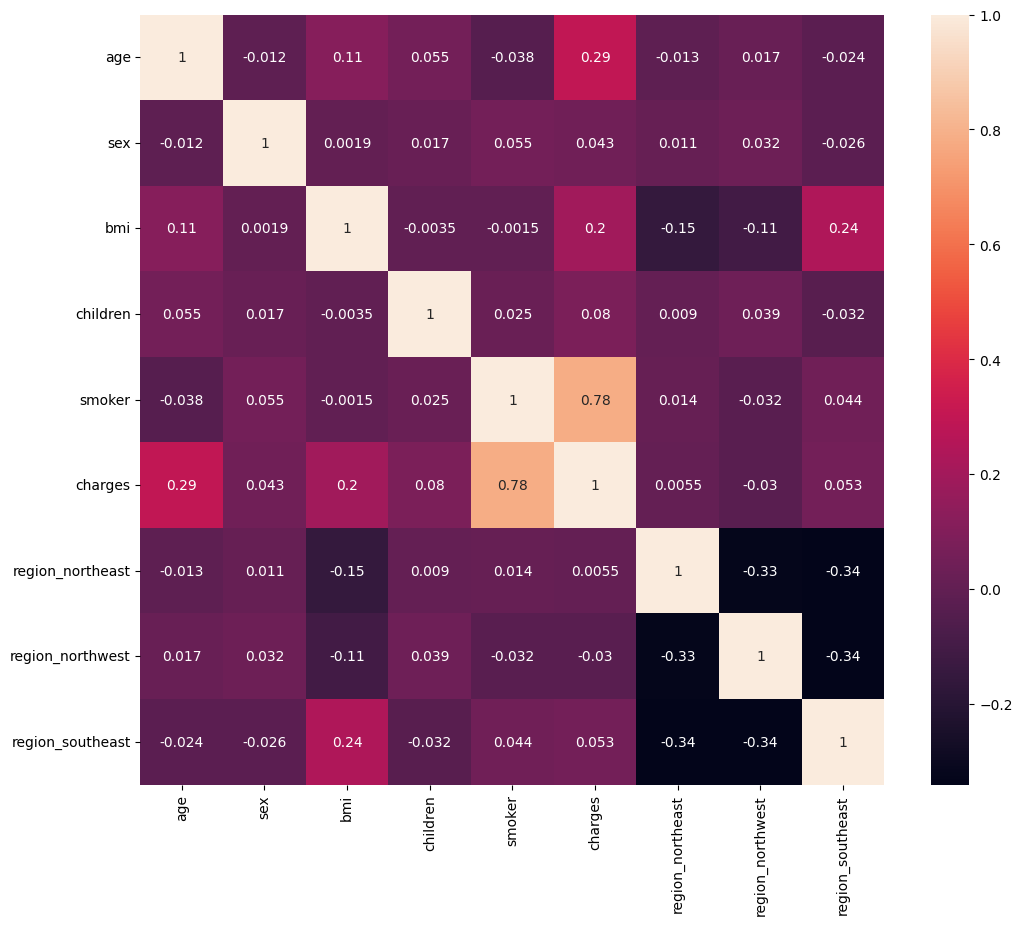

In [75]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [77]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                print(colname)
    return col_corr



In [78]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [79]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((1003, 9), (335, 9))

In [80]:
# feature scaling or stnadardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

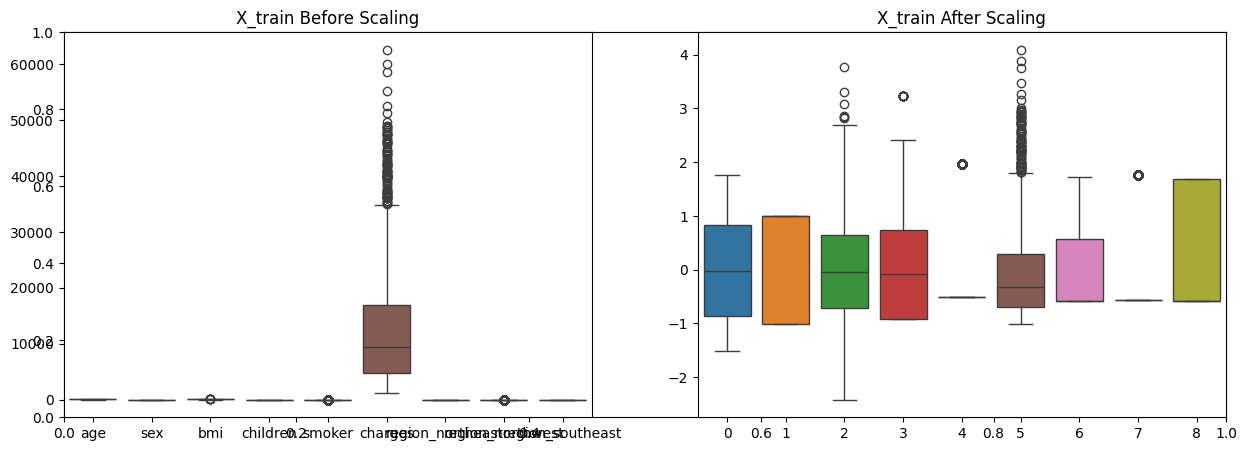

In [ ]:

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

8.858711027755639e-06
0.002976146188300733
0.0029763586860047024
Mean absolute error 0.002976146188300733
R2 Score 0.9999645572604247


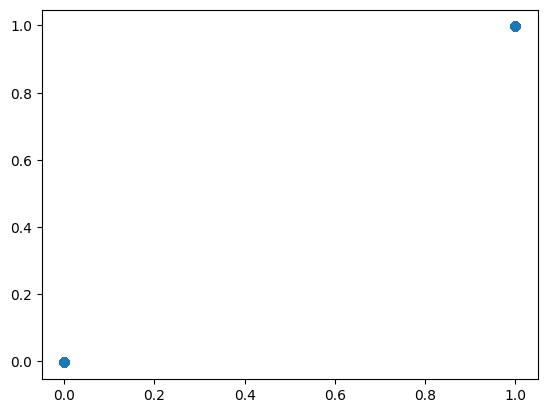

In [ ]:
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled,y_train)
y_pred = linear_regression.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

9.073480893428551e-06
0.0029761461883007446
0.003012221919684629
Mean absolute error 0.0029761461883007446
R2 Score 0.9999636979895449


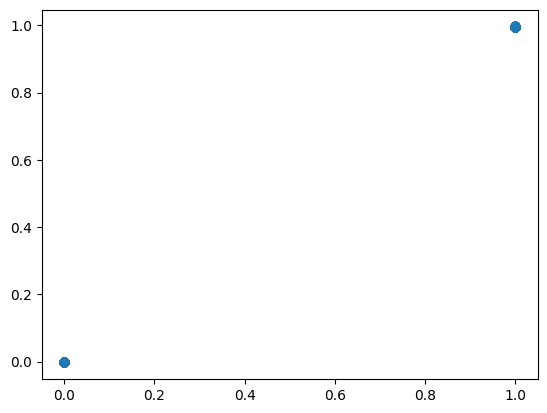

In [83]:
#ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)



0.2499531657553344
0.49993303671076317
0.49995316356168246
Mean absolute error 0.49993303671076317
R2 Score -3.5437678873817546e-05


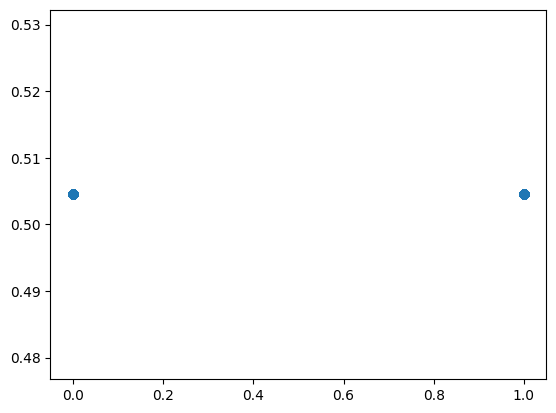

In [84]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.49993303671076317
R2 Score -3.5437678873817546e-05


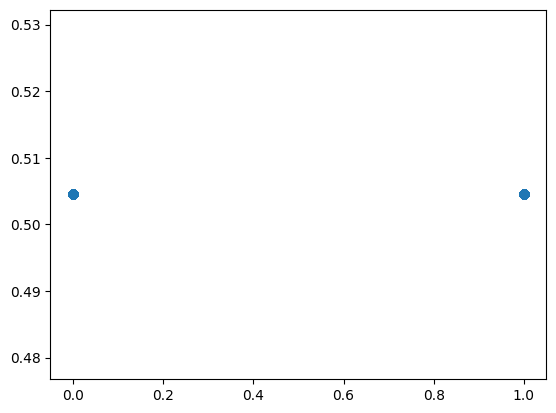

In [85]:
#ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.002976146188300765
R2 Score 0.9999625225706602


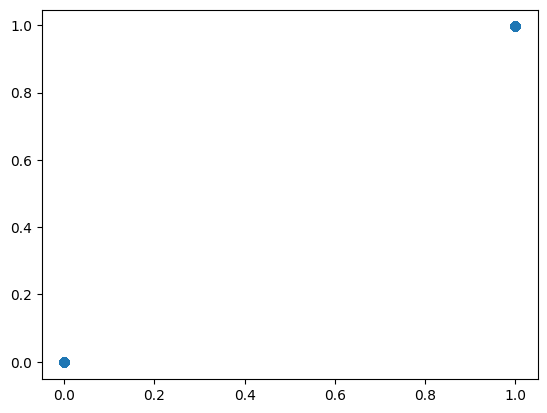

In [86]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [87]:
# Assumption
residuals = (y_test-y_pred)

In [88]:
residuals

764     0.002251
887     0.002251
890     0.002251
1293    0.003680
259     0.003680
          ...   
342     0.002251
308     0.003680
1128    0.003680
503     0.003680
1197    0.003680
Name: sex, Length: 335, dtype: float64

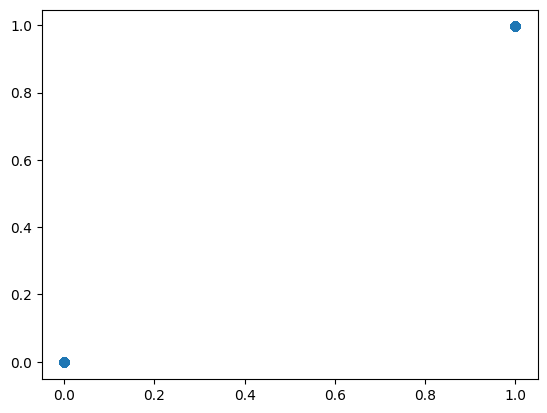

In [89]:
plt.scatter(y_test,y_pred)

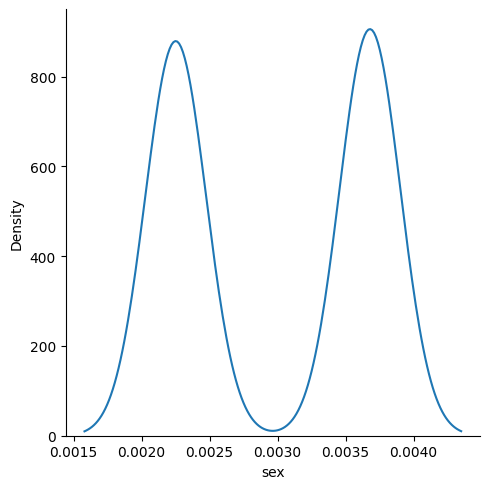

In [90]:
sns.displot(residuals,kind="kde")